# Color Coded Plots of Spectra Embedding

This code produces plots of the 2D spectra embedding with points color-coded by interesting galaxy properties.  

**NB**: to start, only using the first 298,511 points (the unmasked spectra in the first three chunks of 100,000) - these have no indexing problems and are matched to the galaxy parameters in the file `params_noMaskedSpectra_3.csv`  

Will be able to use all points in the embedding after indexing issues with the other chunks have been fixed.  

In [1]:
import numpy as np
from astroML.plotting import setup_text_plots
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

setup_text_plots(fontsize=24)

## Gathering the Data

In [2]:
# read in James's embedding matrix
from scipy.io import mmread
embed = mmread('spectra_embedding_d_2.mtx')

In [3]:
# read in list of indices that are included in the embedding
import pickle
f = open('spectra_affinity_largest_component.p','rb')
inds = pickle.load(f)
f.close()

In [26]:
# check to see where in the sample the missing index is
for ii in np.arange(len(inds)-1):
    if inds[ii] + 1 != inds[ii+1]:
        print inds[ii]

507569


The missing galaxy is not in the first three chunks of 100,000, so I can safely use just the spectra in those chunks that were not masked at every wavelength.

In [5]:
# select only the 298,511 galaxies belonging to the first three chunks
points = embed[:298511, :]

# read in the file of parameters for these 298,511 galaxies
galaxyparams = np.genfromtxt('params_noMaskedSpec_3.csv',delimiter=',',names=True, dtype=float)
galaxyparams.dtype.names

('RA',
 'DEC',
 'PLATEID',
 'MJD',
 'FIBER',
 'Z',
 'Z_ERR',
 'EBV',
 'SN_MEDIAN',
 'G_SPEC_MAG',
 'R_SPEC_MAG',
 'I_SPEC_MAG',
 'G_KCOR_MAG',
 'R_KCOR_MAG',
 'I_KCOR_MAG',
 'D4000',
 'HDELTA',
 'MASS',
 'MASS_P16',
 'MASS_P84',
 'SFR',
 'HALPHA',
 'HALPHA_ERR',
 'HBETA',
 'HBETA_ERR',
 'OII3726',
 'OII3726_ERR',
 'OII3729',
 'OII3729_ERR',
 'OIII5007',
 'OIII5007_ERR',
 'NII6584',
 'NII6584_ERR',
 'DEBLENDED_AT_EDGE',
 'DEBLEND_NOPEAK',
 'AGN',
 'UNIQUE')

## Generating Lots of Color-Coded Plots

In [12]:
def make_cc_plot(ccParam, label, limits=None, filename=None):
    """
    ccParam: an array of the same number of points as in the embedding to use for color-coding
    label: string for labeling the color bar
    limits: a list of two values, [vmin, vmax], that define the lower and upper limits of the color-coding
    filename: a string specifying a filename, e.g. 'plot.pdf', to which to save the plot
    """
    plt.figure(figsize=(10,7))
    if limits:
        plt.scatter(points[:,0], points[:,1], c=ccParam, s=5, lw=0, cmap='rainbow', vmin=limits[0], vmax=limits[1])
    else:
        plt.scatter(points[:,0], points[:,1], c=ccParam, s=5, lw=0, cmap='rainbow')
    plt.xlim([-0.008, 0.003])
    plt.ylim([-0.015, 0.005])
    plt.colorbar(label=label)
    if filename:
        plt.savefig(filename, rasterized=True)

### Galaxy Apparent Magnitude and Color

**r-band apparent magnitude**: how bright the galaxy appears (intrinsic luminosity + distance affect this); traces stellar mass

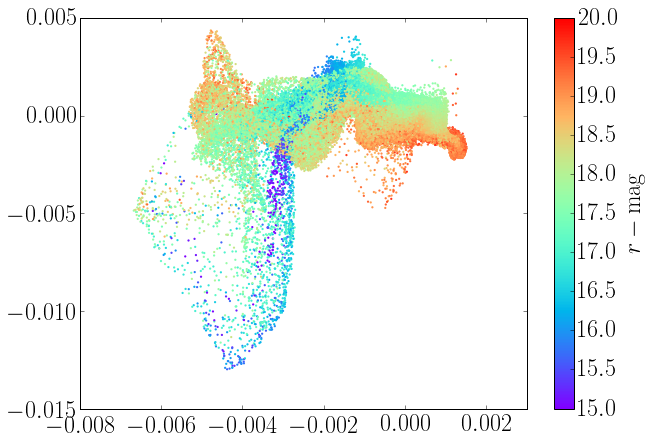

In [52]:
make_cc_plot(galaxyparams['R_SPEC_MAG'], r'$r-\mathrm{mag}$', limits=[15., 20.], filename='ccEmbed_rmag.jpg')

**g-r color**: how blue the galaxy appears; smaller g-r == bluer; bluer galaxies have more young stars/recent star formation

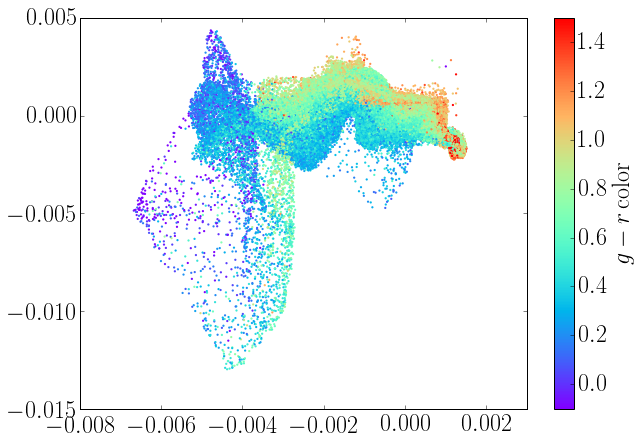

In [53]:
make_cc_plot(galaxyparams['G_SPEC_MAG']-galaxyparams['R_SPEC_MAG'], r'$g-r \, \mathrm{color}$', limits =[-0.1, 1.5], \
            filename='ccEmbed_gr.jpg')

### Derived Galaxy Properties: Stellar Mass, Star Formation Rate

**stellar mass**: total current mass in stars

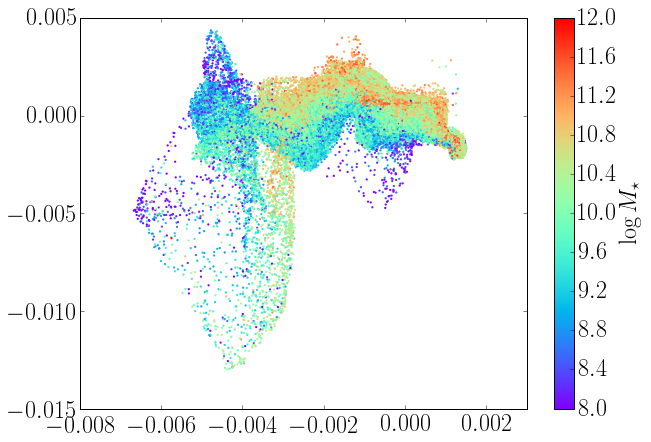

In [54]:
make_cc_plot(galaxyparams['MASS'], r'$\log M_\star$', limits=[8,12], filename='ccEmbed_mass.jpg')

**star formation rate**: current rate at which new stars are forming

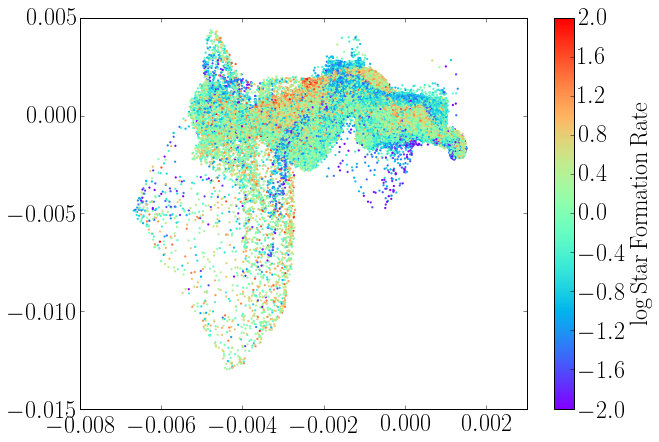

In [55]:
make_cc_plot(galaxyparams['SFR'], r'$\log \mathrm{Star \, Formation \, Rate}$', limits=[-2,2], \
             filename='ccEmbed_sfr.jpg')

**specific star formation rate**: SFR normlaized by the stellar mass; high sSFR means that current star formation is very important relative to past star formation

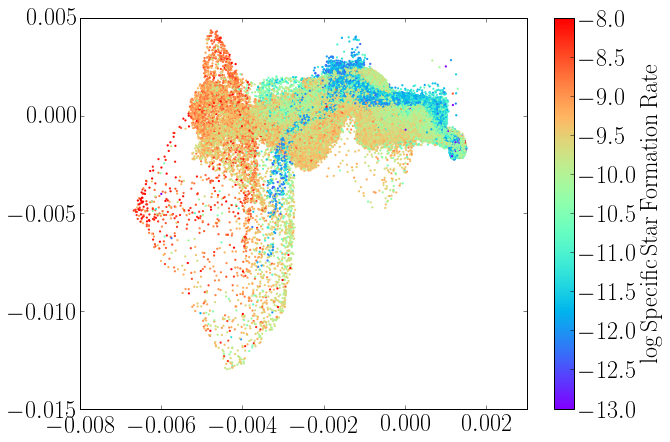

In [56]:
make_cc_plot(galaxyparams['SFR'] - galaxyparams['MASS'], r'$\log \mathrm{Specific \, Star \, Formation \, Rate}$', \
            limits=[-13,-8], filename='ccEmbed_ssfr.jpg')

**H$\alpha$ flux**: flux in a bright emission line; should trace sSFR

/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


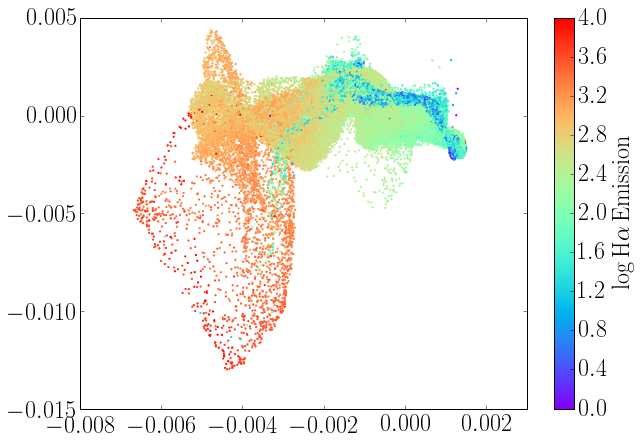

In [57]:
make_cc_plot(np.log10(galaxyparams['HALPHA']), r'$\log \mathrm{H}\alpha \, \mathrm{Emission}$',limits=[0,4], \
            filename='ccEmbed_Halpha.jpg')

### Lick Indices

**D4000 Index**: measures mean age of stellar population; low D4000 == young stellar population

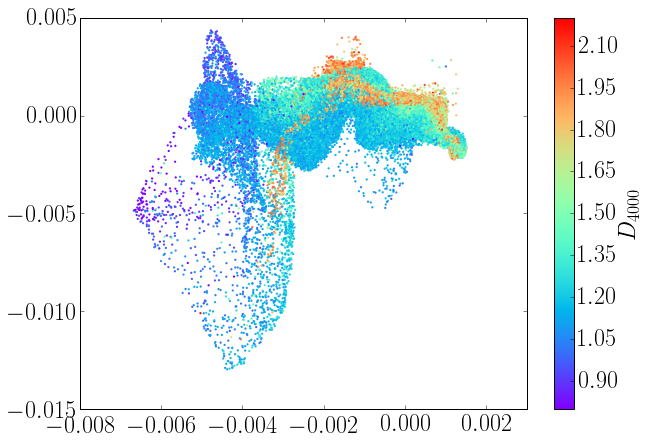

In [58]:
make_cc_plot(galaxyparams['D4000'], r'$D_{4000}$', limits=[0.8,2.2], filename='ccEmbed_D4000.jpg')

**H$\delta$ Index**: large value means that a substantial fraction of stars formed in a burst ~1 billion years ago

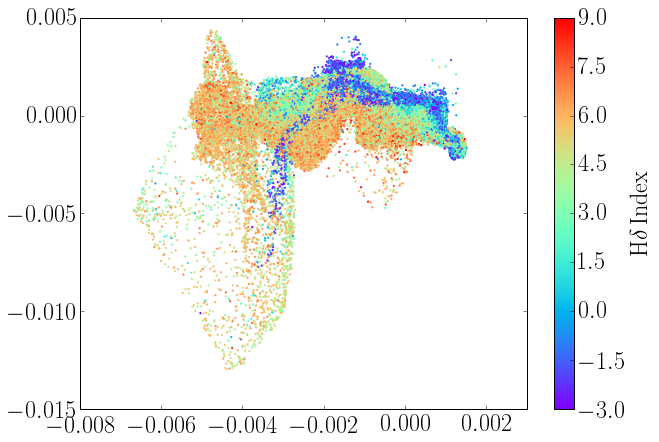

In [59]:
make_cc_plot(galaxyparams['HDELTA'], r'$\mathrm{H}\delta \, \mathrm{Index}$', limits=[-3,9], \
             filename='ccEmbed_Hdelta.jpg')

### Emission Line Ratios

**AGN Boolean**: whether a galaxy is defined as an AGN based on emission line ratios and the criterion from Kauffmann+2003; 0 == dominated by star formation, 1 == dominated by nuclear activity (accretion onto supermassive black hole)

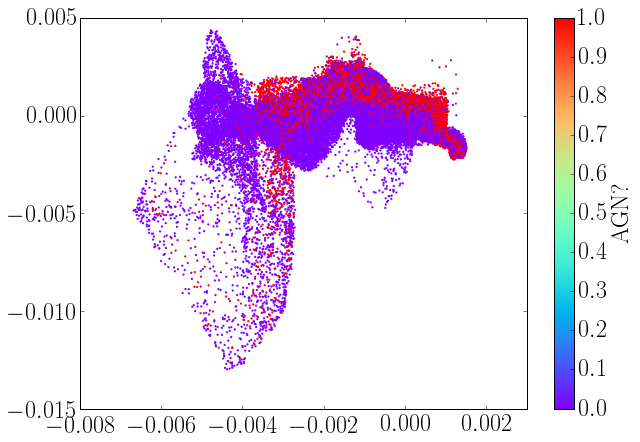

In [60]:
make_cc_plot(galaxyparams['AGN'], r'$\mathrm{AGN?}$', filename='ccEmbed_AGN.jpg')

**NII/H$\alpha$**: commonly used emission line ratio in BPT diagrams

/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


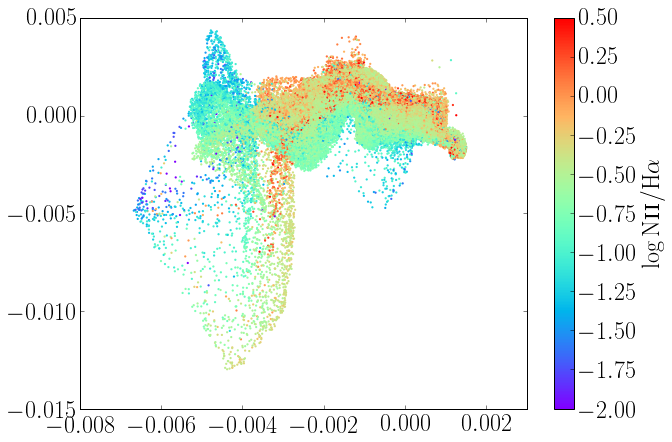

In [61]:
make_cc_plot(np.log10(galaxyparams['NII6584']/galaxyparams['HALPHA']), r'$\log \mathrm{N\textsc{ii}/H}\alpha$', \
            limits=[-2,0.5], filename='ccEmbed_NIIHalpha.jpg')

**NII/OII**: ratio of NII flux to OII flux; traces the relative abundances of nitrogen and oxygen in a galaxy, which is also related to the total metal content of the galaxy. *This plot appears to show a sequence in the "main portion" of the embedding!*

/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


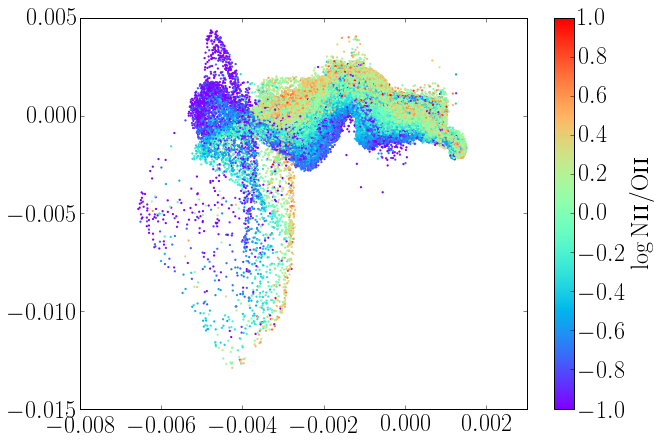

In [62]:
make_cc_plot(np.log10(galaxyparams['NII6584']/(galaxyparams['OII3726'] + galaxyparams['OII3729'])), \
                      r'$\log \mathrm{N\textsc{ii}/O\textsc{ii}}$', limits=[-1,1], filename='ccEmbed_NIIOII.jpg')

**OIII/OII**: ratio of OIII flux to OII flux; measures how much ionizing ratiation is available in the galaxy to generate higher ionization states of ions. Higher ratio == more ionizing flux.

/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


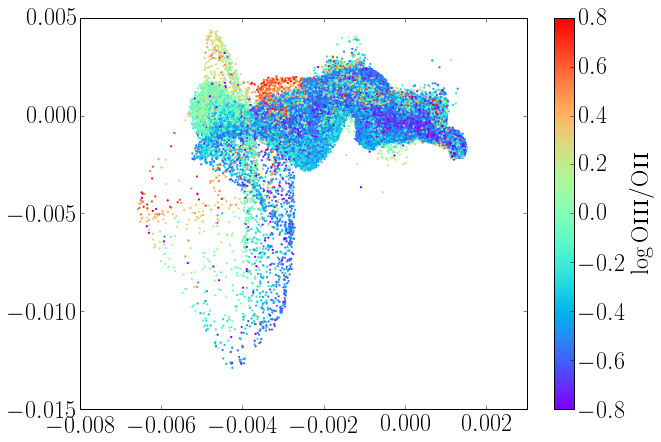

In [63]:
make_cc_plot(np.log10(galaxyparams['OIII5007']/(galaxyparams['OII3726'] + galaxyparams['OII3729'])), \
                      r'$\log \mathrm{O\textsc{iii}/O\textsc{ii}}$', limits=[-0.8,0.8], \
                         filename='ccEmbed_OIIIOII.jpg')

**Balmer Decrement H$\alpha$/H$\beta$**: measures how much dust is present in the galaxy. dust attenuates bluer light, so a higher Balmer decrement means more of the blue H$\beta$ flux has been absorbed, therefore more dust.

/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/Users/ogtelford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


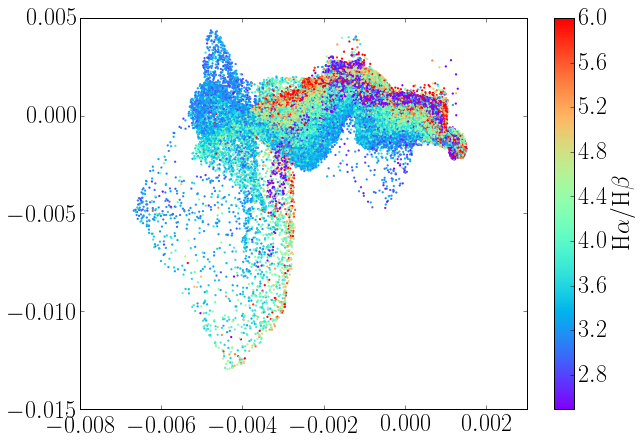

In [64]:
make_cc_plot(galaxyparams['HALPHA']/galaxyparams['HBETA'], r'$\mathrm{H}\alpha/\mathrm{H}\beta$', \
            limits=[2.5,6], filename='ccEmbed_BalmerDec.jpg')